# Лабораторная работа 2. Линейная регрессия. Градиентный спуск

Вспомним нормальное уравнение:

$$\overrightarrow{w}_{opt} = \left(X^TX\right)^{-1}X^T\overrightarrow{y}.$$

Здесь присутствует обращение матрицы $X^TX$ – довольно трудоёмкая операция при большом количестве признаков: сложность вычислений $O(d^3)$. При решении реальных задач такая трудоёмкость часто оказывается непозволительной, поэтому параметры модели (весовые коэффициенты) ищут итерационными методами, стоимость которых меньше. Один из них – *градиентный спуск* (gradient descent – ['greɪdɪənt dɪ'sent]).

Напомним, что в градиентном спуске значения параметров на следующем шаге получаются из значений параметров на текущем шаге смещением в сторону антиградиента функционала ошибки: 

$$\overrightarrow{w}^{(k+1)} = \overrightarrow{w}^{(k)} - \eta_k \nabla Q(\overrightarrow{w}^{(k)}),$$
где $\eta_k$ – шаг градиентного спуска.

Формула градиента функционала ошибки выглядит следующим образом:

$$\nabla Q(\overrightarrow{w}) = \nabla_\overrightarrow{w}\left(\frac{1}{l}\|X\overrightarrow{w}-\overrightarrow{y}\|^2\right) = \frac{2}{l}X^T(X\overrightarrow{w} - \overrightarrow{y}).$$
 
Сложность вычислений в данном случае $O(dl)$.

In [378]:
import numpy as np
import matplotlib.pyplot as plt

**Задание 1. Реализация градиентного спуска**  

Напишите функцию `gradient_descent`, которая находит вектор весов на основе градиентного спуска.  

В качестве критериев остановки можно использовать максимальное количество шагов и/или количество шагов, при котором отсутствуют значимые изменения весов.

Проверьте работу функции на простом примере из лекций:

$$x_1=2, x_2=3, x_3=5,$$

$$y_1=1, y_2=3, y_3=4.$$

Нарисуйте исходные данные и полученную линию регресии при помощи ``matplotlib``: для рисования точек используйте ``plt.scatter``, для рисования линии – ``plt.plot``.  

Сравните полученные результаты с результатами, полученными на основе нормального уравнения.

In [379]:
x = np.array([2, 3, 5])
y = np.array([1, 3, 4])

In [380]:
def gradient_descent(X, y, lr=0.01, max_iter=1000, eps=1e-6):
    X = X.reshape(-1, 1)
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    m = len(y)
    theta = np.array([np.random.choice(X[:, 1]), np.random.choice(X[:, 1])])
    # print(theta)
    # loss_history = []
    iterations = 0
    for _ in range(max_iter):
        iterations += 1
        predictions = X.dot(theta)
        gradient = (1 / m) * X.T.dot(predictions - y)
        new_theta = theta - lr * gradient
        # loss = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
        # loss_history.append(loss)
        if np.linalg.norm(new_theta - theta) < eps:
            break
        theta = new_theta
    
    return theta, iterations


In [381]:
def batch_gradient_descent(X, y, lr=0.01, max_iter=1000, eps=1e-6, batch_size=32):
    X = X.reshape(-1, 1)
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    m = len(y)
    theta = np.array([np.random.choice(X[:, 1]), np.random.choice(X[:, 1])])

    iterations = 0
    for _ in range(max_iter):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            iterations += 1
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            predictions = X_batch.dot(theta)
            gradient = (1 / batch_size) * X_batch.T.dot(predictions - y_batch)
            new_theta = theta - lr * gradient
            if np.linalg.norm(new_theta - theta) < eps:
                return new_theta, iterations

            theta = new_theta

    return theta, iterations

In [382]:
def get_gradient(X, y, type='default', lr=0.01, max_iter=1000, eps=1e-6, batch_size=100):
    if type == 'default':
        return batch_gradient_descent(X, y, lr, max_iter, eps, len(X))
    elif type == 'batch':
        return batch_gradient_descent(X, y, lr, max_iter, eps, batch_size)
    elif type == 'stochastic':
        return batch_gradient_descent(X, y, lr, max_iter, eps, 1)
    else:
        raise ValueError('Invalid type')

In [383]:
def get_prediction(theta, x):
    return theta[1] * x + theta[0]

In [384]:
theta, iterations = get_gradient(x, y)
print("Веса, найденные градиентным спуском:", theta)

Веса, найденные градиентным спуском: [0.42408389 0.7021365 ]


In [385]:
X = np.c_[np.ones(x.shape[0]), x]
theta_normal = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("Веса, найденные нормальным уравнением:", theta_normal)

Веса, найденные нормальным уравнением: [-0.42857143  0.92857143]


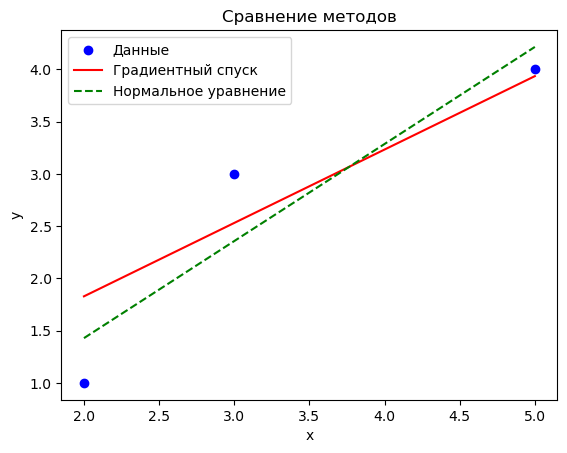

In [386]:
plt.scatter(x, y, color='blue', label='Данные')
y_pred_gd = X.dot(theta)
plt.plot(x, y_pred_gd, color='red', label='Градиентный спуск')
y_pred_ne = X.dot(theta_normal)
plt.plot(x, y_pred_ne, color='green', linestyle='--', label='Нормальное уравнение')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Сравнение методов')
plt.show()


**Задание 2. Исследование скорости спуска**  

Протестируйте функцию `gradient_descent` на наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` для разных значений скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.  

Оцените количество шагов для получения решения в каждом случае.

In [387]:
data_train = np.loadtxt('../data/ml_lab1_train.txt', delimiter=',')
data_test = np.loadtxt('../data/ml_lab1_test.txt', delimiter=',')
X_train = data_train[:, 0]
print(X_train)
y_train = data_train[:, 1]
X_test = data_test[:, 0]
y_test = data_test[:, 1]

[-0.2  -0.14 -0.08 -0.02  0.04  0.1   0.16  0.22  0.28  0.34  0.4   0.46
  0.52  0.58  0.64  0.7   0.76  0.82  0.88  0.94  1.  ]


In [388]:
from sklearn.metrics import mean_squared_error
def check_learning_speed(type):
    print(f"gradient type: {type}")
    for i in [0.5, 1.0, 2.0]:
        print(f"learning rate: {i}")
        theta, iterations = get_gradient(X_train, y_train, type=type, lr=i)
        print(f"TRAIN: theta = {theta} iterations = {iterations}")
        y_train_pred = get_prediction(theta, X_train)
        y_test_pred = get_prediction(theta, X_test)
        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)
        print(f"MSE TRAIN: {mse_train}, MSE TEST: {mse_test}")

In [389]:
check_learning_speed('default')
check_learning_speed('batch')
check_learning_speed('stochastic')

gradient type: default
learning rate: 0.5
TRAIN: theta = [4.43322435 2.27914906] iterations = 180
MSE TRAIN: 0.29689663329105115, MSE TEST: 0.43511958984201715
learning rate: 1.0
TRAIN: theta = [4.4332278  2.27914139] iterations = 81
MSE TRAIN: 0.2968966332689024, MSE TEST: 0.4351199116093045
learning rate: 2.0
TRAIN: theta = [-1.81970291e+134 -8.19547751e+133] iterations = 1000
MSE TRAIN: 4.700509712337671e+268, MSE TEST: 4.732525434936226e+268
gradient type: batch
learning rate: 0.5
TRAIN: theta = [4.43326515 2.27905847] iterations = 580
MSE TRAIN: 0.2968966340402003, MSE TEST: 0.43512338929343064
learning rate: 1.0
TRAIN: theta = [4.43321413 2.27917175] iterations = 386
MSE TRAIN: 0.29689663344924117, MSE TEST: 0.43511863861656136
learning rate: 2.0
TRAIN: theta = [4.43323914 2.27911621] iterations = 191
MSE TRAIN: 0.2968966333075387, MSE TEST: 0.4351209674625598
gradient type: stochastic
learning rate: 0.5
TRAIN: theta = [4.55901933 2.49280652] iterations = 3424
MSE TRAIN: 0.347552

C:\Users\giezz\AppData\Local\Temp\ipykernel_17564\46323081.py:20: RuntimeWarning: invalid value encountered in subtract
  new_theta = theta - lr * gradient


ValueError: Input contains NaN.

**Задание 3. Стохастический градиентный спуск**  

Стохастический градиентный спуск отличается от обычного заменой градиента на его оценку по одному или нескольким объектам. В этом случае сложность становится $O(kd)$, где $k$ – количество объектов, по которым оценивается градиент, $k<<l$. Это отчасти объясняет популярность стохастических методов оптимизации.  

Реализуйте функцию `stochastic_gradient_descent`, которая находит вектор весов на основе стохастического градиентного спуска (вычисление градиента на одном случайном примере).  

На наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` оцените количество шагов для получения решения при разных значениях скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.

In [374]:
def stochastic_gradient_descent(X, y, lr=0.01, max_iter=1000, eps=1e-6):
    X = X.reshape(-1, 1)
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    m = len(y)
    theta = np.array([np.random.choice(X[:, 1]), np.random.choice(X[:, 1])])
    iterations = 0

    for _ in range(max_iter):
        iterations += 1
        idx = np.random.randint(m)
        X_i = X[idx:idx+1]
        # print("x ",X_i)
        y_i = y[idx]
        # print("y ", y_i)
        prediction = X_i.dot(theta)
        gradient = X_i.T.dot(prediction - y_i)
        new_theta = theta - lr * gradient
        if np.linalg.norm(new_theta - theta) < eps:
            return new_theta, iterations

        theta = new_theta

    return theta, iterations

In [375]:
for i in [0.5, 1.0, 2.0] :
    print(f"learning rate: {i}")
    theta, iterations = stochastic_gradient_descent(X_train, y_train, lr=i, max_iter=1000, eps=1e-6)
    print(f"TRAIN: theta = {theta} iterations = {iterations}")
    theta, iterations = stochastic_gradient_descent(X_test, y_test, lr=i, max_iter=1000, eps=1e-6)
    print(f"TEST: theta = {theta} iterations = {iterations}")

learning rate: 0.5
TRAIN: theta = [4.61909446 2.43273139] iterations = 759
TEST: theta = [4.62823494 2.96522575] iterations = 1000
learning rate: 1.0
TRAIN: theta = [5.13932184 4.23353898] iterations = 1000
TEST: theta = [4.99559929 1.57519778] iterations = 1000
learning rate: 2.0
TRAIN: theta = [8.34400686e+126 2.11308219e+127] iterations = 1000
TEST: theta = [-8.33395056e+128 -2.51472130e+127] iterations = 1000


**Задание 4. Градиентный спуск по мини-батчам**  

Реализуйте функцию `mini_batch_gradient_descent`, которая находит вектор весов на основе градиентного спуска по мини-батчам (вычисление градиента на подмножестве случайно выбранных примеров). Размер мини-батча должен быть параметром функции.  

На наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` оцените количество шагов для получения решения при разных значениях скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.

In [376]:
def mini_batch_gradient_descent(X, y, lr=0.01, max_iter=1000, eps=1e-6, batch_size=32):
    X = X.reshape(-1, 1)
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    m = len(y)
    theta = np.random.randn(2)

    iterations = 0
    for _ in range(max_iter):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            predictions = X_batch.dot(theta)
            gradient = (1 / batch_size) * X_batch.T.dot(predictions - y_batch)
            new_theta = theta - lr * gradient
            if np.linalg.norm(new_theta - theta) < eps:
                return new_theta, iterations

            theta = new_theta

        iterations += 1

    return theta, iterations

In [377]:
for i in [0.5, 1.0, 2.0] :
    print(f"learning rate: {i}")
    theta, iterations = stochastic_gradient_descent(X_train, y_train, lr=i, max_iter=1000, eps=1e-6)
    print(f"TRAIN: theta = {theta} iterations = {iterations}")
    theta, iterations = stochastic_gradient_descent(X_test, y_test, lr=i, max_iter=1000, eps=1e-6)
    print(f"TEST: theta = {theta} iterations = {iterations}")

learning rate: 0.5
TRAIN: theta = [4.84623204 2.20559381] iterations = 111
TEST: theta = [5.11221283 2.1738802 ] iterations = 1000
learning rate: 1.0
TRAIN: theta = [4.99845634 2.63877843] iterations = 430
TEST: theta = [3.80510612 3.16428111] iterations = 1000
learning rate: 2.0
TRAIN: theta = [-5.7375641e+114 -3.2231968e+113] iterations = 1000
TEST: theta = [-4.51715053e+126 -6.77747680e+126] iterations = 1000
